# Лабораторная работа №14
## Аппроксимации граничных условий второго рода в методе конечных разностей на примере уравнения теплопроводности
### Вариант 1
*Задание.* Найти приближенное решение начально-краевой задачи для уравнения теплопроводности:

$$
\begin{equation}
  \begin{cases}
    \frac{\partial u}{dt}=k\frac{\partial^2u}{\partial x^2}+f(x,t),  a < x < b, 0 < t \le T \\
    u(a, t) = g_1(t), \frac{\partial u}{\partial x}(b,t) = g_2(t),  0 < t \le T,\\
    u(x, 0) = \varphi(x), a \le x \le b.
  \end{cases}
\end{equation}
$$

используя явную и неявную разностные схемы.
Изобразить графики зависимости приближенного решения от x при t =0 , 2τ , 4τ ,…T

In [64]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import sympy as sp
from scipy.integrate import odeint
from mpl_toolkits import mplot3d
from matplotlib import cm
from prettytable import PrettyTable

In [107]:
# initial data variant 10
x, t = sp.symbols('x t')
# initial condition
a, b = 0, 1
k = 1
T = 0.05
# steps size
h_x = 0.02
h_t = 0.5 * h_x**2 / k
# expression of initial function
phi_expr = 0
g1_expr = 0
g2_expr = 0
f_expr = x
# initial functions
phi = sp.lambdify(x, phi_expr)
g1 = sp.lambdify(t, g1_expr)
g2 = sp.lambdify(t, g2_expr)
f = sp.lambdify((x, t), f_expr)

## Общая постановка задачи

Дано следующее уравнение:

$$
\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}  + f(x), x \in [a, b], t \in [0, T]
$$

Зададим оператор $L$:

$$
L = \frac{\partial}{\partial t} - \frac{\partial^2}{\partial x^2}
$$

Для аппроксимации оператора $L$ с помощью явной схемы используем следующие точки:

![](https://refdb.ru/images/1449/2896254/4b092928.png)

Обозначим для удобства точки следующим образом:

$$
x_{j,k} = (x, t)
$$

Тогда, обозначив разность 
$$x_{j,k}-x_{j-1, k} = h$$
A
$$x_{j,k+1}-x_{j,k}=\tau$$

Получаем:

$$
x_{j-1, k} = (x - h, t)
$$
$$x_{j+1, k} = (x + h, t)
$$
$$
x_{j, k + 1} = (x, t + \tau)
$$
Используя эти точки можем аппроксимировать функции

### 1. Явная схема

$$
\frac{\partial u}{\partial t} = \frac{u(x, t + \tau) - u(x, t)}{\tau}
$$

$$
\frac{\partial^2 u}{\partial x^2} = \frac{u(x+h, t) - 2u(x, t) + y(x-h, t)}{h^2}
$$

Таким образом результат оператора $Lu$:

$$
Lu = \frac{u(x, t + \tau) - u(x, t)}{\tau} - \frac{u(x+h, t) - 2u(x, t) + y(x-h, t)}{h^2}
$$

Теперь давайте выразим отсюда $u(x, t + \tau)$:

$$
u(x, t + \tau) = u(x, t) + \tau(\frac{u(x + h, t)}{h^2} - 2 \frac{u(x, t)}{h^2} + \frac{u(x-h, t)}{h^2})
$$

### Итого приведя слагаемые:

$$
u(x, t + \tau) = \frac{\tau}{h^2}u(x-h,t) + (1 - \frac{2\tau}{h^2})u(x,t) + \frac{\tau}{h^2}u(x+h, t)
$$ 


### 2. Неявная схема

$$
\frac{\partial u}{\partial t} = \frac{u(x, t + \tau) - u(x, t)}{\tau}
$$

$$
\frac{\partial^2 u}{\partial x^2} = \frac{u(x+h, t + \tau) - 2u(x, t + \tau) + y(x-h, t + \tau)}{h^2}
$$

Таким образом результат оператора $Lu$:

$$
Lu = \frac{u(x, t + \tau) - u(x, t)}{\tau} - \frac{u(x+h, t+\tau) - 2u(x, t+\tau) + y(x-h, t+\tau)}{h^2}
$$

Теперь давайте выразим отсюда $u(x, t)$:

$$
u(x, t) = u(x, t + \tau) - \tau(\frac{u(x + h, t+\tau)}{h^2} + 2 \frac{u(x, t+\tau)}{h^2} - \frac{u(x-h, t+\tau)}{h^2})
$$

### Итого приведя слагаемые:

$$
u(x, t) = -\frac{\tau}{h^2}u(x-h,t+\tau) + (1 + \frac{2\tau}{h^2})u(x,t+\tau) - \frac{\tau}{h^2}u(x+h, t+\tau)
$$ 

In [1]:
def plot_3d(xs, ts, Z):
    X, Y = np.meshgrid(xs, ts)
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    # surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=2)
    
    fig.colorbar(surf, shrink=0.5, aspect=5)
    
    plt.show()

In [2]:
def plot_2d(xs, matrix_ys, step):
    for i in range(0, len(matrix_ys), step):
        plt.plot(xs, matrix_ys[i])
    
    plt.grid()
    plt.show()

# 1. Явная схема

### Явная схема

*Левая разность*

Используем аппроксимацию производной:
$$
\frac{\partial u}{\partial x} =\frac{u(x_n, \tau_N) - u(x_{n-1}, \tau_N)}{h} 
$$
Тогда: 
$$
g_2(\tau_N)=\frac{u(x_n, \tau_N) - u(x_{n-1}, \tau_N)}{h} 
$$
И
$$
u(x_n, \tau_N)=u(x_{n-1}, \tau_N)+hg_2(\tau_N)
$$

*Центральная разность*
$$
\frac{\partial u}{\partial x} =\frac{u(x_{n+1}, \tau_N) - u(x_{n-1}, \tau_N)}{2h} 
$$
Тогда: 
$$
g_2(\tau_N)=\frac{u(x_{n+1}, \tau_N) - u(x_{n-1}, \tau_N)}{2h} 
$$
И
$$
u(x_{n+1}, \tau_N)=u(x_{n-1}, \tau_N)+2hg_2(\tau_N)
$$


### Формула для явной схема с учётом константы:

$$
u(x, t + \tau) = \frac{c \cdot \tau}{h^2}u(x-h,t) + (1 - \frac{c \cdot \tau}{h^2})u(x,t) + \frac{c \cdot \tau}{h^2}u(x+h, t) + \tau f(x), c - const
$$ 

#### Первый метод

Правое краевое условие задано следующим образом:

$$
\frac{\partial u}{\partial x}(b, t) = g_2(t)
$$

Для первого метода правое краевое условие будем аппроксимировать по формуле:

$$
\frac{\partial T}{\partial x} = \frac{T_N^n - T_{n-1}^n}{h}
$$

Таким образом:

$$
T_N^n = h g_2(t) + T_{N-1}^n
$$

In [110]:
def explicit_method(a, b, k, T, phi, g1, g2, f, h_x, h_t):
    hx_step_amount = int((b - a) / h_x)
    ht_step_amount = int(T / h_t)
    
    h_x = (b - a) / hx_step_amount
    h_t = T / ht_step_amount
    
    h_xs = np.linspace(a, b, hx_step_amount)
    h_ts = np.linspace(0, T, ht_step_amount)
    
    matrix = np.zeros(shape=(ht_step_amount, hx_step_amount))
    
    matrix[0, 1:-1] = np.array([phi(hs) for hs in h_xs[1:-1]])
    matrix[:, 0] = np.array([g1(ht) for ht in h_ts])
#     matrix[:, -1] = np.array([g2(h_ts[i]) * h_t + matrix[i-1, -1] for i in range(len(h_ts))])
    
    coefs = [
        k * h_t / h_x**2,
        1 - 2 * k * h_t / h_x**2,
        k * h_t / h_x**2,
    ]
    
    for i in range(1, ht_step_amount):
        prev_layer = matrix[i - 1]
        matrix[i, 1: -1] = (
            sum(coefs[i] * prev_layer[i:len(prev_layer)-2+i] for i in range(3)) # sum yn-1 yn yn+1
            + np.array([h_t * f(hx, h_ts[i-1]) for hx in h_xs[1:-1]]) # vector of tau * f(x, t)
        )
        matrix[i, -1] = matrix[i, -2] + h_x * g2(h_ts[i])
    
    #plot_2d(h_xs, matrix, 5)
    #plot_3d(h_xs, h_ts, matrix)
    
    return matrix

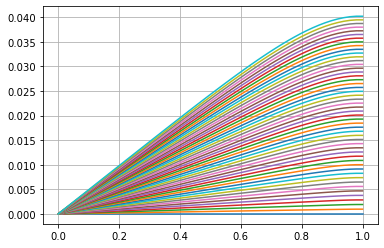

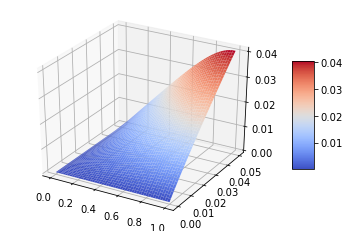

In [109]:
exp_res1 = explicit_method(a, b, k, T, phi, g1, g2, f, h_x, h_t)

#### Второй способ

Правое граничное условие будем аппроксимировать по обычной формуле при помощи добавления фиктивных узлов. Для этого аппроксимируем граничное условие следующим образом:

$$
\frac{\partial T}{\partial x} = \frac{T_{N + 1}^n - T_{N-1}^n}{2h}
$$

Отсюда выразим фиктивный узел:

$$
T_{N+1}^n = 2h g_2(t) + T_{N-1}^n
$$

Подставив это в нашу исходную формулу получим:

$$
u(b, t + \tau) = \frac{c \cdot \tau}{h^2}u(b-h,t) + (1 - \frac{c \cdot \tau}{h^2})u(b,t) + \frac{c \cdot \tau}{h^2}(
2h g_2(t) + T_{N-1}^n) + \tau f(x), c - const
$$

In [111]:
def explicit_method_2(a, b, k, T, phi, g1, g2, f, h_x, h_t):
    hx_step_amount = int((b - a) / h_x) + 1
    ht_step_amount = int(T / h_t) + 1
    
    h_xs = np.linspace(a, b, hx_step_amount)
    h_ts = np.linspace(0, T, ht_step_amount)
    
    matrix = np.zeros(shape=(ht_step_amount, hx_step_amount))
    
    matrix[0, 1:-1] = np.array([phi(hs) for hs in h_xs[1:-1]])
    matrix[:, 0] = np.array([g1(ht) for ht in h_ts])
#     matrix[:, -1] = np.array([g2(h_ts[i]) * h_t + matrix[i-1, -1] for i in range(len(h_ts))])
    
    coefs = [
        k * h_t / h_x**2,
        1 - 2 * k * h_t / h_x**2,
        k * h_t / h_x**2,
    ]
    
    for i in range(1, ht_step_amount):
        prev_layer = matrix[i - 1]
        matrix[i, 1: -1] = (
            sum(coefs[i] * prev_layer[i:len(prev_layer)-2+i] for i in range(3)) # sum yn-1 yn yn+1
            + np.array([h_t * f(hx, h_ts[i-1]) for hx in h_xs[1:-1]]) # vector of tau * f(x, t)
        )
        matrix[i, -1] = (2 * coefs[0] * matrix[i-1, -2] 
                         + coefs[1] * matrix[i-1, -1] 
                         + h_t * f(b, h_ts[i])
                         + 2 * h_x * coefs[0] * g2(h_ts[i]))
    
    plot_2d(h_xs, matrix, 5)
    plot_3d(h_xs, h_ts, matrix)
    
    return matrix

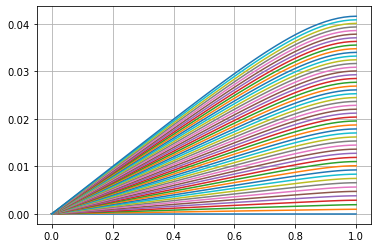

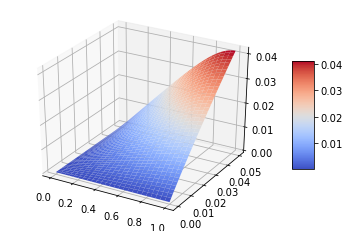

In [112]:
exp_res2 = explicit_method_2(a, b, k, T, phi, g1, g2, f, h_x, h_t)

# 2. Неявная схема

Для каждой строки матрицы (кроме первой - заполняется начальным условием) необходимо решить систему линейных уравнений (каждый текущий член, зависит от следующего):

$$
u(x, t) + \tau f(t) = -\frac{с\tau}{h^2}u(x-h,t+\tau) + (1 + \frac{2c\tau}{h^2})u(x,t+\tau) - \frac{c\tau}{h^2}u(x+h, t+\tau)
$$ 

$c = const$

Таким образом для нахождения решения можно заполнить матрицу коэффициентов и затем на каждом новом временном слое находить новый вектор свободных членов, т.е матрица будет иметь вид:

$ 1 0 .... $

$ k_1 k_2 k_3 ....$

$ 0 k_1 k_2 k_3 ...$

............

$ 0 ...... -1 1$'

Взависимости от способа будут отличаться последние строки в нашей матрице коэффициентов и векторе свободных членов
)
$$
u(x, t) + \tau f(t)= -\frac{с\tau}{h^2}u(x-h,t+\tau) + (1 + \frac{2c\tau}{h^2})u(x,t+\tau) - \frac{c\tau}{h^2}u(x+h, t+\tau)
$$ 
$c = const$


#### Первый способ

Правое краевое условие задано следующим образом:

$$
\frac{\partial u}{\partial x}(b, t) = g_2(t)
$$

Для первого метода правое краевое условие будем аппроксимировать по формуле:

$$
\frac{\partial T}{\partial x} = \frac{T_N^n - T_{n-1}^n}{h}
$$

Таким образом:

$$
 - T_{N-1}^n + T_N^n= h g_2(t)
$$

Таким образом коэффициенты в последней строке матрицы коэффициентов $-1, 1$, а в векторе свободных членов последний элемент $=hg_2(t)$ 

In [125]:
def implicit_method(a, b, k, T, phi, g1, g2, f, h_x, h_t):
    hx_step_amount = int((b - a) / h_x) + 1
    ht_step_amount = int(T / h_t) + 1
    
    h_xs = np.linspace(a, b, hx_step_amount)
    h_ts = np.linspace(0, T, ht_step_amount)
    
    matrix = np.zeros(shape=(ht_step_amount, hx_step_amount))
    
    matrix[0, 1:-1] = np.array([phi(hs) for hs in h_xs[1:-1]])
    matrix[:, 0] = np.array([g1(ht) for ht in h_ts])
    matrix[:, -1] = np.array([g2(ht) * h_t for ht in h_ts])
    
    coefs = [
        -k * h_t / h_x**2,
        1 + 2 * k * h_t / h_x**2,
        -k * h_t / h_x**2,
    ]
    
    coefs_matrix = np.zeros(shape=(hx_step_amount, hx_step_amount))
    # fill coefs matrix
    np.fill_diagonal(coefs_matrix, coefs[1])
    np.fill_diagonal(coefs_matrix[1:], coefs[0])
    np.fill_diagonal(coefs_matrix[:, 1:], coefs[2])
    # fill border condition coefs matrix
    coefs_matrix[0, 0] = 1
    coefs_matrix[0, 1] = 0
    coefs_matrix[-1, -2] = -1
    coefs_matrix[-1, -1] = 1
    
    
    for i in range(1, ht_step_amount):
        rhs = np.array([h_t * f(hx, h_ts[i]) for hx in h_xs]) + matrix[i-1]
        rhs[0] = g1(h_ts[i])
        rhs[-1] = h_x * g2(h_ts[i])
        matrix[i] = np.linalg.solve(coefs_matrix, rhs)
        
    #plot_2d(h_xs, matrix, 5)
    #plot_3d(h_xs, h_ts, matrix)
    
    return matrix

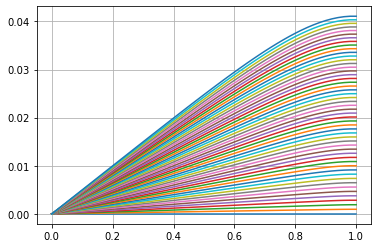

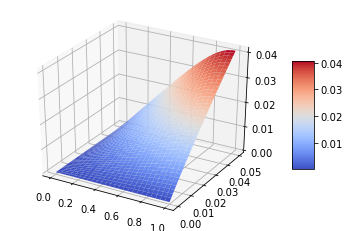

In [113]:
imp_res1 = implicit_method(a, b, k, T, phi, g1, g2, f, h_x, h_t)

#### Второй способ

Правое граничное условие будем аппроксимировать по обычной формуле при помощи добавления фиктивных узлов. Для этого аппроксимируем граничное условие следующим образом:

$$
\frac{\partial T}{\partial x} = \frac{T_{N + 1}^n - T_{N-1}^n}{2h}
$$

Отсюда выразим фиктивный узел:

$$
T_{N+1}^n = 2h g_2(t) + T_{N-1}^n
$$

Подставив это в нашу исходную формулу получим:

$$
-\frac{2c \cdot \tau}{h^2}u(b-h,t) + (1 + \frac{c \cdot \tau}{h^2})u(b,t) = -\frac{c \cdot \tau}{h^2}
2h g_2(t) + \tau f(x) + u(b, t), c - const
$$

Отсюда соответственно и берём последнюю строку для матрицы коэффициентов и последний элемент в матрице свободных членов

In [28]:
def implicit_method_2(a, b, k, T, phi, g1, g2, f, h_x, h_t):
    hx_step_amount = int((b - a) / h_x) + 1
    ht_step_amount = int(T / h_t) + 1
    
    h_xs = np.linspace(a, b, hx_step_amount)
    h_ts = np.linspace(0, T, ht_step_amount)
    
    matrix = np.zeros(shape=(ht_step_amount, hx_step_amount))
    
    matrix[0, 1:-1] = np.array([phi(hs) for hs in h_xs[1:-1]])
    matrix[:, 0] = np.array([g1(ht) for ht in h_ts])
    matrix[:, -1] = np.array([g2(ht) * h_t for ht in h_ts])
    
    coefs = [
        -k * h_t / h_x**2,
        1 + 2 * k * h_t / h_x**2,
        -k * h_t / h_x**2,
    ]
    
    coefs_matrix = np.zeros(shape=(hx_step_amount, hx_step_amount))
    # fill coefs matrix
    np.fill_diagonal(coefs_matrix, coefs[1])
    np.fill_diagonal(coefs_matrix[1:], coefs[0])
    np.fill_diagonal(coefs_matrix[:, 1:], coefs[2])
    # fill border condition coefs matrix
    coefs_matrix[0, 0] = 1
    coefs_matrix[0, 1] = 0
    coefs_matrix[-1, -2] = 2 * coefs[0]
#     coefs_matrix[-1, -1] =
    
    # rhs = np.zeros(shape=(1, hx_step_amount))
    
    
    for i in range(1, ht_step_amount):
        rhs = np.array([h_t * f(hx, h_ts[i]) for hx in h_xs]) + matrix[i-1]
        rhs[0] = g1(h_ts[i])
        rhs[-1] += -2 * h_x * coefs[0] * g2(b) 
        matrix[i] = np.linalg.solve(coefs_matrix, rhs)
        
    plot_2d(h_xs, matrix, 5)
    plot_3d(h_xs, h_ts, matrix)
    
    return matrix

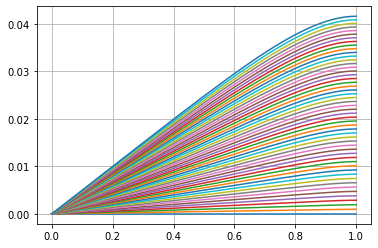

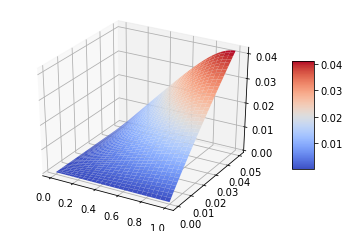

In [114]:
imp_res2 = implicit_method_2(a, b, k, T, phi, g1, g2, f, h_x, h_t)

# Результаты расчётов

In [115]:
# initial condition
a, b = 0, 1
k = 1
T = 0.05
# expression of initial function
phi_expr = 0
g1_expr = 0
g2_expr = 0
f_expr = x
# initial functions
phi = sp.lambdify(x, phi_expr)
g1 = sp.lambdify(t, g1_expr)
g2 = sp.lambdify(t, g2_expr)
f = sp.lambdify((x, t), f_expr)

In [116]:
mantissa_len = 10

### Fix $\tau$

In [117]:
# standard deviation
def SD_t(m1, m2, layer1, layer2):
    if len(m1[0]) > len(m2[0]):
        m1, m2 = m2, m1
        layer1, layer2 = layer2, layer1
    return np.sqrt(sum((m1[layer1][i] - m2[layer2][2*i])**2 for i in range(len(m1[0]))) / len(m1[0]))

In [118]:
def max_deviation_t(m1, m2, layer1, layer2):
    if len(m1[0]) > len(m2[0]):
        m1, m2 = m2, m1
        layer1, layer2 = layer2, layer1
    return max(np.abs([m1[layer1][i] - m2[layer2][2*i] for i in range(len(m1[0]))]))

In [98]:
Ns = np.array([5 * 2**i for i in range(4, -1, -1)])
Ns

array([80, 40, 20, 10,  5])

In [131]:
table = np.zeros(shape=(len(Ns), 7))

# select randomly t1 and t2
#layer1 = random.randint(1, Ns[-1] - 1)
#layer2 = random.randint(1, Ns[-1] - 1)
layer1 = 3
layer2 = 4

prev_res = None

print("t1 = {}, t2 = {}".format(T / Ns[-1] * layer1, T / Ns[-1] * layer2))

Xs = np.linspace(a, b, Ns[0] + 1)
tau = 0.5 * (Xs[1] - Xs[0])**2 / k

for i, N in enumerate(Ns):
    h_x = (b - a) / N
    res = explicit_method(a, b, T, k, phi, g1, g2, f, h_x, tau)
    if prev_res is None:
        table[i][0] = Ns[i]
        table[i][1] = Xs[1] - Xs[0]   
        table[i][2] = round(tau, mantissa_len) 
        table[i][3] = 0
        table[i][4] = 0
        table[i][5] = 0
        table[i][6] = 0
    else:
        # compute indexes of t1 and t2
        t11 = layer1 * Ns[i-1] // Ns[-1]
        t12 = layer1 * Ns[i] // Ns[-1]
        t21 = layer2 * Ns[i-1] // Ns[-1]
        t22 = layer2 * Ns[i] // Ns[-1]
        table[i][0] = Ns[i]
        table[i][1] = h_x   
        table[i][2] = tau 
        table[i][3] = SD_t(prev_res, res, t11, t12)
        table[i][4] = SD_t(prev_res, res, t21, t22)
        table[i][5] = max_deviation_t(prev_res, res, t11, t12)
        table[i][6] = max_deviation_t(prev_res, res, t21, t22)
    prev_res = res

df = pd.DataFrame(table, columns=['$N$', '$N h$', '$t$', '$s{(t=t_{n1})}$', '$s{(t=t_{n2})}$', '$max{|t_{n1}|}$', '$max{|t_{n2}|}$'])
df

t1 = 0.03, t2 = 0.04


,$N$,$N h$,$t$,$s{(t=t_{n1})}$,$s{(t=t_{n2})}$,$max{|t_{n1}|}$,$max{|t_{n2}|}$
0,80.0,0.0125,0.000078,0.000000,0.000000,0.000000,0.000000
1,40.0,0.0250,0.000078,0.001063,0.001418,0.001858,0.002472
2,20.0,0.0500,0.000078,0.000524,0.000699,0.000936,0.001247
3,10.0,0.1000,0.000078,0.000258,0.000344,0.000471,0.000628
4,5.0,0.2000,0.000078,0.000132,0.000176,0.000241,0.000321


In [130]:
table = np.zeros(shape=(len(Ns), 7))

# select randomly t1 and t2
#layer1 = random.randint(1, Ns[-1] - 1)
#layer2 = random.randint(1, Ns[-1] - 1)
layer1 = 3
layer2 = 4
prev_res = None

print("t1 = {}, t2 = {}".format(T / Ns[-1] * layer1, T / Ns[-1] * layer2))

Xs = np.linspace(a, b, Ns[0] + 1)
tau = 0.5 * (Xs[1] - Xs[0])**2 / k

for i, N in enumerate(Ns):
    h_x = (b - a) / N
    res = implicit_method(a, b, T, k, phi, g1, g2, f, h_x, tau)
    if prev_res is None:
        table[i][0] = Ns[i]
        table[i][1] = Xs[1] - Xs[0]   
        table[i][2] = round(tau, mantissa_len) 
        table[i][3] = 0
        table[i][4] = 0
        table[i][5] = 0
        table[i][6] = 0
    else:
        # compute indexes of t1 and t2
        t11 = layer1 * Ns[i-1] // Ns[-1]
        t12 = layer1 * Ns[i] // Ns[-1]
        t21 = layer2 * Ns[i-1] // Ns[-1]
        t22 = layer2 * Ns[i] // Ns[-1]
        table[i][0] = Ns[i]
        table[i][1] = h_x   
        table[i][2] = tau 
        table[i][3] = SD_t(prev_res, res, t11, t12)
        table[i][4] = SD_t(prev_res, res, t21, t22)
        table[i][5] = max_deviation_t(prev_res, res, t11, t12)
        table[i][6] = max_deviation_t(prev_res, res, t21, t22)
    prev_res = res

df = pd.DataFrame(table, columns=['$N$', '$N h$', '$t$', '$s{(t=t_{n1})}$', '$s{(t=t_{n2})}$', '$max{|t_{n1}|}$', '$max{|t_{n2}|}$'])
df

t1 = 0.03, t2 = 0.04


,$N$,$N h$,$t$,$s{(t=t_{n1})}$,$s{(t=t_{n2})}$,$max{|t_{n1}|}$,$max{|t_{n2}|}$
0,80.0,0.0125,0.000078,0.000000,0.000000,0.000000,0.000000
1,40.0,0.0250,0.000078,0.001088,0.001451,0.001857,0.002471
2,20.0,0.0500,0.000078,0.000548,0.000730,0.000934,0.001245
3,10.0,0.1000,0.000078,0.000277,0.000370,0.000468,0.000624
4,5.0,0.2000,0.000078,0.000142,0.000189,0.000234,0.000312


### Fix $h$

In [120]:
# standard deviation
def SD_h(m1, m2, layer1, layer2):
    return np.sqrt(sum((m1[layer1][i] - m2[layer2][i])**2 for i in range(len(m1[0]))) / len(m1[0]))

In [121]:
def max_deviation_h(m1, m2, layer1, layer2):
    return max(np.abs([m1[layer1][i] - m2[layer2][i] for i in range(len(m1[0]))]))

In [122]:
Ts = np.array([100*2**i for i in range(5)])
Ts

array([ 100,  200,  400,  800, 1600])

In [128]:
table = np.zeros(shape=(len(Ns), 7))

max_tau = T / Ts[0]
h_x = np.sqrt(2 * k * max_tau)

# select randomly t1 and t2
#layer1 = random.randint(1, Ts[0] - 1)
#layer2 = random.randint(1, Ts[0] - 1)
layer1 = 3
layer2 = 4

prev_res = None

print("t1 = {}, t2 = {}".format(T / Ts[0] * layer1, T / Ts[0] * layer2))


for i, h_t in enumerate(Ts):
    tau = T / h_t
    res = explicit_method(a, b, T, k, phi, g1, g2, f, h_x, tau)
    if prev_res is None:
        table[i][0] = Ts[i]
        table[i][1] = h_x   
        table[i][2] = round(tau, mantissa_len) 
        table[i][3] = 0
        table[i][4] = 0
        table[i][5] = 0
        table[i][6] = 0
    else:
        # compute indexes of t1 and t2
        t11 = layer1 * Ts[i-1] // Ts[0]
        t12 = layer1 * Ts[i] // Ts[0]
        t21 = layer2 * Ts[i-1] // Ts[0]
        t22 = layer2 * Ts[i] // Ts[0]
        table[i][0] = Ts[i]
        table[i][1] = h_x   
        table[i][2] = tau 
        table[i][3] = SD_h(prev_res, res, t11, t12)
        table[i][4] = SD_h(prev_res, res, t21, t22)
        table[i][5] = max_deviation_h(prev_res, res, t11, t12)
        table[i][6] = max_deviation_h(prev_res, res, t21, t22)
    prev_res = res
    

df = pd.DataFrame(table, columns=['$N$', '$N h$', '$t$', '$s{(t=t_{n1})}$', '$s{(t=t_{n2})}$', '$max{|t_{n1}|}$', '$max{|t_{n2}|}$'])
df

t1 = 0.0015, t2 = 0.002


,$N$,$N h$,$t$,$s{(t=t_{n1})}$,$s{(t=t_{n2})}$,$max{|t_{n1}|}$,$max{|t_{n2}|}$
0,100.0,0.031623,0.000500,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,200.0,0.031623,0.000250,7.276515e-08,9.488010e-08,2.863107e-07,3.730689e-07
2,400.0,0.031623,0.000125,3.599320e-08,4.695894e-08,1.415820e-07,1.845702e-07
3,800.0,0.031623,0.000063,1.790244e-08,2.336295e-08,7.040917e-08,9.180781e-08
4,1600.0,0.031623,0.000031,8.928059e-09,1.165280e-08,3.511049e-08,4.578624e-08


In [129]:
table = np.zeros(shape=(len(Ns), 7))

max_tau = T / Ts[0]
h_x = np.sqrt(2 * k * max_tau)

# select randomly t1 and t2
#layer1 = random.randint(1, Ts[0] - 1)
#layer2 = random.randint(1, Ts[0] - 1)
layer1 = 3
layer2 = 4

prev_res = None

print("t1 = {}, t2 = {}".format(T / Ts[0] * layer1, T / Ts[0] * layer2))


for i, h_t in enumerate(Ts):
    tau = T / h_t
    res = implicit_method(a, b, T, k, phi, g1, g2, f, h_x, tau)
    if prev_res is None:
        table[i][0] = Ts[i]
        table[i][1] = h_x   
        table[i][2] = round(tau, mantissa_len) 
        table[i][3] = 0
        table[i][4] = 0
        table[i][5] = 0
        table[i][6] = 0
    else:
        # compute indexes of t1 and t2
        t11 = layer1 * Ts[i-1] // Ts[0]
        t12 = layer1 * Ts[i] // Ts[0]
        t21 = layer2 * Ts[i-1] // Ts[0]
        t22 = layer2 * Ts[i] // Ts[0]
        table[i][0] = Ts[i]
        table[i][1] = h_x   
        table[i][2] = tau 
        table[i][3] = SD_h(prev_res, res, t11, t12)
        table[i][4] = SD_h(prev_res, res, t21, t22)
        table[i][5] = max_deviation_h(prev_res, res, t11, t12)
        table[i][6] = max_deviation_h(prev_res, res, t21, t22)
    prev_res = res
    

df = pd.DataFrame(table, columns=['$N$', '$N h$', '$t$', '$s{(t=t_{n1})}$', '$s{(t=t_{n2})}$', '$max{|t_{n1}|}$', '$max{|t_{n2}|}$'])
df

t1 = 0.0015, t2 = 0.002


,$N$,$N h$,$t$,$s{(t=t_{n1})}$,$s{(t=t_{n2})}$,$max{|t_{n1}|}$,$max{|t_{n2}|}$
0,100.0,0.031623,0.000500,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,200.0,0.031623,0.000250,6.899722e-08,9.009356e-08,2.753966e-07,3.591959e-07
2,400.0,0.031623,0.000125,3.484830e-08,4.548007e-08,1.391555e-07,1.814204e-07
3,800.0,0.031623,0.000063,1.751437e-08,2.285167e-08,6.995247e-08,9.117843e-08
4,1600.0,0.031623,0.000031,8.780106e-09,1.145418e-08,3.507128e-08,4.570790e-08
